(lecture10:the-uniform-distribution)=
# The uniform distribution

In {ref}`lecture10:example-manufacturing-steel-balls`, we had a random variable
for which all values between a given interval were equally probable.
This is a very common situation covered by the so-called *uniform distribution*.

Let's start with the simplest case: a random variable taking values between 0 and 1
with constant probability density.
We write:

$$
X\sim U([0,1]),
$$

and we read

> $X$ follows a uniform distribution taking values in $[0,1]$.

The probability density of the uniform is constant in $[0,1]$ and zero outside it.
We have:

$$
p(x) := \begin{cases}
c,&\;0\le x \le 1,\\
0,&\;\text{otherwise}.
\end{cases}
$$

What should the constant $c$ be?
Just like in {ref}`lecture10:example-manufacturing-steel-balls`, you can find it by ensuring the PDF
integrates to one (see [PDF Property 5](lecture10:pdf-property-5):

$$
\int_0^1 p(x) dx = 1 \Rightarrow c = 1.
$$

So, the PDF is:

$$
p(x) := \begin{cases}
1,&\;0\le x \le 1,\\
0,&\;\text{otherwise}.
\end{cases}
$$

To find the CDF, we can use [PDF Property 3](lecture10:pdf-property-3):

$$
F(x) = p(X \le x) = \int_0^x p(\tilde{x}) d\tilde{x} = \int_0^x d\tilde{x} = x.
$$

Obviously, we have $F(x) = 0$ for $x < 0$ and $F(x) = 1$ for $x > 1$.

Using this result, we can find the probability that $X$ takes values in $[a,b]$ for $a < b$ in $[0,1]$.
It is:

$$
p(a \le X \le b) = F(b) - F(a) = b - a.
$$

## Instantiating the uniform using `scipy.stats`

Let me know show you how you can make a uniform random variable using scipy:

In [14]:
MAKE_BOOK_FIGURES=False

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

def set_book_style():
    plt.style.use('seaborn-v0_8-white') 
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings
        'font.family': 'serif',  # For academic publishing
        'font.size': 8,  # As requested, 10pt font
        'axes.labelsize': 8,
        'axes.titlesize': 8,
        'xtick.labelsize': 7,  # Slightly smaller for better readability
        'ytick.labelsize': 7,
        'legend.fontsize': 7,
        
        # Line and marker settings for consistency
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,
        
        # Layout to prevent clipped labels
        'figure.constrained_layout.use': True,
        
        # Default DPI (will override when saving)
        'figure.dpi': 600,
        'savefig.dpi': 600,
        
        # Despine - remove top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,
        
        # Remove legend frame
        'legend.frameon': False,
        
        # Additional trim settings
        'figure.autolayout': True,  # Alternative to constrained_layout
        'savefig.bbox': 'tight',    # Trim when saving
        'savefig.pad_inches': 0.1   # Small padding to ensure nothing gets cut off
    })

def save_for_book(fig, filename, is_vector=True, **kwargs):
    """
    Save a figure with book-optimized settings.
    
    Parameters:
    -----------
    fig : matplotlib figure
        The figure to save
    filename : str
        Filename without extension
    is_vector : bool
        If True, saves as vector at 1000 dpi. If False, saves as raster at 600 dpi.
    **kwargs : dict
        Additional kwargs to pass to savefig
    """    
    # Set appropriate DPI and format based on figure type
    if is_vector:
        dpi = 1000
        ext = '.pdf'
    else:
        dpi = 600
        ext = '.tif'
    
    # Save the figure with book settings
    fig.savefig(f"{filename}{ext}", dpi=dpi, **kwargs)


def make_full_width_fig():
    return plt.subplots(figsize=(4.7, 2.9), constrained_layout=True)

def make_half_width_fig():
    return plt.subplots(figsize=(2.35, 1.45), constrained_layout=True)

if MAKE_BOOK_FIGURES:
    set_book_style()
make_full_width_fig = make_full_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()
make_half_width_fig = make_half_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()

import numpy as np
import scipy.stats as st

In [15]:
X = st.uniform()

Here is how you can get some samples:

In [16]:
X.rvs(size=10)

array([0.51359985, 0.51085162, 0.42398006, 0.96542763, 0.84253755,
       0.25692261, 0.73972264, 0.50787341, 0.41223479, 0.98443402])

You can evalute the PDF at any point like this:

In [17]:
X.pdf(0.5)

1.0

In [18]:
X.pdf(-0.1)

0.0

In [19]:
X.pdf(1.5)

0.0

Let's plot the PDF:

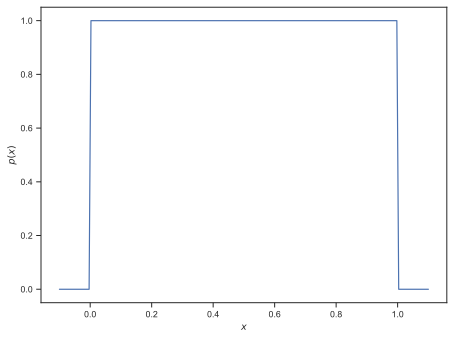

In [20]:
fig, ax = make_half_width_fig()
xs = np.linspace(-0.1, 1.1, 200)
ax.plot(xs, X.pdf(xs))
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')
save_for_book(fig, 'ch10.fig3')

You can evaluate the CDF like this:

In [21]:
X.cdf(-0.5)

0.0

In [22]:
X.cdf(0.5)

0.5

In [23]:
X.cdf(1.2)

1.0

Let's plot the CDF:

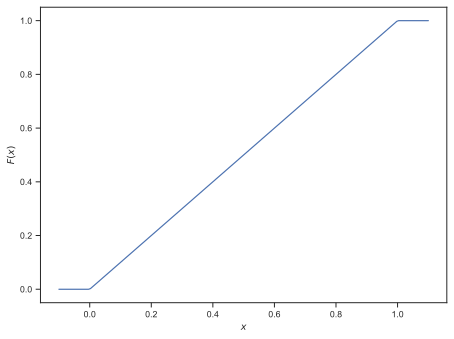

In [24]:
fig, ax = make_half_width_fig()
ax.plot(xs, X.cdf(xs))
ax.set_xlabel('$x$')
ax.set_ylabel('$F(x)$');
save_for_book(fig, 'ch10.fig4')

Finally, let's find the probability that $X$ is between two numbers $a$ and $b$.
For the uniform it is, of course, trivial, but let's see how it is done using the `scipy` functionality:

In [25]:
a = -1.0
b = 0.3
prob_X_is_in_ab = X.cdf(b) - X.cdf(a)
print(f'p({a:1.2f} <= X <= {b:1.2f}) = {prob_X_is_in_ab:1.2f}')

p(-1.00 <= X <= 0.30) = 0.30


# The uniform distribution over an arbitrary interval $[a, b]$

The uniform distribution can also be defined over an arbitrary interval $[a,b]$.
We write:
$$
X \sim U([a, b]).
$$
We read:

> $X$ follows a uniform distribution on $[a, b]$.

The PDF of this random variable is:

$$
p(x) = \begin{cases}
c,&\;x\in[a,b],\\
0,&\;\text{otherwise},
\end{cases}
$$

where $c$ is a positive constant.
This simply tells us that the probability density of finding $X$ in $[a,b]$ is something positive and that the probability density of findinig outside is exactly zero.
This is exactly the situation we had in {ref}`lecture10:example-manufacturing-steel-balls`.
The positive constant $c$ is determined by imposing the normalization condition:

$$
\int_{-\infty}^{+\infty}p(x)dx = 1.
$$

This gives:

$$
1 = \int_{-\infty}^{+\infty}p(x)dx = \int_a^bc dx = c \int_a^bdx = c (b-a).
$$

From this we get:

$$
c = \frac{1}{b - a},
$$

and we can now write:

$$
p(x) = \begin{cases}
\frac{1}{b-a},&x \in [a, b],\\
0,&\;\text{otherwise},
\end{cases}
$$

From the PDF, we can now find the CDF for $x \in [a,b]$:

$$
F(x) = p(X\le x) = \int_{-\infty}^x p(\tilde{x})d\tilde{x} = \int_a^x \frac{1}{b-a}d\tilde{x} = \frac{1}{b-a}\int_a^xd\tilde{x} = \frac{x-a}{b-a}.
$$


## Instantiating the generic uniform using `scipy.stats`:
Let's instantiate using `scipy.stats`:

In [26]:
a = -2.0
b = 5.0
X = st.uniform(loc=a, scale=(b-a))

Some samples:

In [27]:
X.rvs(size=10)

array([ 0.4260982 ,  3.49514026,  0.11549076,  1.76774986,  3.98379601,
        0.2459555 , -0.82579455, -1.84763909,  0.87274428,  2.49321367])

The PDF:

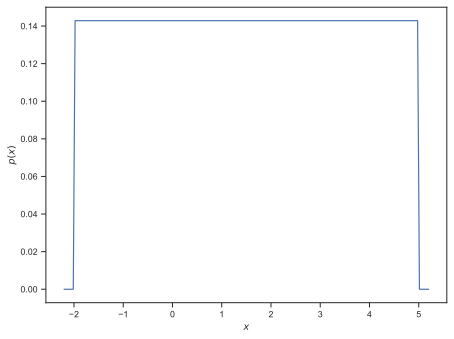

In [28]:
fig, ax = make_half_width_fig()
xs = np.linspace(a - 0.2, b + 0.2, 200)
ax.plot(xs, X.pdf(xs))
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')
save_for_book(fig, 'ch10.fig5')

The CDF:

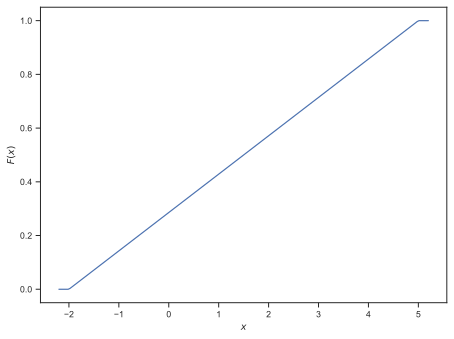

In [29]:
fig, ax = make_half_width_fig()
ax.plot(xs, X.cdf(xs))
ax.set_xlabel('$x$')
ax.set_ylabel('$F(x)$')
save_for_book(fig, 'ch10.fig6')

### Questions

+ Repeat the code above so that the random variable is $U([1, 10])$.